# what does live lecture cover 

Type 1: Examples of how to do interesting things in python (today)

Type 2: Deeper dives into the theory of what is happening "under the hood" or "inside the machine" (next week) This stuff can help you avoid nasty bugs

Type 3: Stuff that will help on HW or your project

First, quick primer or lists 

In [8]:
x=2
print(x)
print(x+1)

#Lists are like C++ vectors 
L=[1,2,3]
print(L)
print(L[2])

#append is the equivalent of push_back it adds and item to a list
L.append(4)
print(L)


2
3
[1, 2, 3]
3
[1, 2, 3, 4]


# How can we model a Pandemic???

There are a wide range of infectious disease models, as many as there are diseases, their variants and strategies to control them. However, the starting point for modeling many infectious diseases is the SIR model, which can be understood as:
* **S**: people susceptible to the disease (number of people who can get it)
* **I**: those who are infectious with the disease (can spread it)
* **R**: people recovered from the disease (they are well and not spreading)

__Missing compartments:__ Dead people and vaccinated people. This is a simple model that is pre-vaccine. For this model, somewhat morbidly, dead people are in the recovered category. Here the definition of recovered is someone who can no longer transmit the diseases. The reason they do this is to predict the total number of infections. Once you predict infectiosn you can then use that number to predict other quantities of interest such as hospitalization and deaths

The SIR model is called a `compartment model` because everyone in the population is put into one of three different compartments. You find out more about the model [here](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model).

In this model, we let N be the total population, and let S0, I0, R0 be the number of susceptible, infection, and recovered people at the start of the pandemic. 

There are two parameters in this model, $\beta$ which can be thought of as the `coefficient of infection` and and $\gamma$ which can be thought of as the `coefficient of recovery`. (Disclaimer: I am not an epidemiologist and made these terms up.) 

The "official version" of this model uses calculus and/or differential equations. In this class, we will implement a discrete time version of this model. We will assume that each day
- some people move from susceptible to infected: $\beta*S*I$.
The idea here is that the number of new infections is proportional to the number of interactions between S people and I people. This should be directly proportional to both the number so S people and the number of I people
- some people move from infected to recovered: $\gamma*I$

This leads to the model:
(This stuff here is called LaTeX, it is how you typeset math. It works in markdown mode.)
\begin{align*}
S_{t+1}-S_t&=-\beta S_t I_t\\
I_{t+1}-I_t&=\beta S_t I_t - \gamma I_t\\
R_{t+1}-R_t&= \gamma I_t
\end{align*}

$S_{t+1}-S_t=-\beta S_t I_t\Rightarrow S_{t+1}=S_t-\beta S_t I_t$


For this example, we will assume N=1000000, I0=10, $\beta=.0000001$,
$\gamma=.01$, and run the model for 365 days. In the real word, estimating $\beta$ and $\gamma$ should be done via statistical methods such as maximum likelihood estimates.

In [38]:
#total pop
N=1000000

#coefficients
beta=.0000001 #social distancing makes beta go down (a good thing)
gamma=.01 #improved therapies make gamma go up (also good)
N_days=365

#initial values
I0=10 
S0=N-I0
R0=0






In [41]:
#range 10 means the first ten numbers starting at 0 ie 0,1,2,3,4,5,6,7,8,9
#for i in range(10): 
#    print(i)
    
#range(1,11) is the numbers starting at 1, up to but not including 11 ie 1,2,3,4,5,6,7,8,9,10
#for i in range(1,11):
#    print(i)

S=[S0]
I=[I0]
R=[R0]

#original model
"""for i in range(1,N_days+1):
    S.append(S[i-1] - beta*S[i-1]*I[i-1])  #beta*S*I
    I.append(I[i-1] + beta*S[i-1]*I[i-1] - gamma*I[i-1]) 
    R.append(R[i-1]+gamma*I[i-1])"""
    
#in the real world, people infected again
#people move from recovered to susceptible at rate delta*R
delta=gamma/2
for i in range(1,N_days+1):
    S.append(S[i-1] - beta*S[i-1]*I[i-1]+delta*R[i-1])  #beta*S*I
    I.append(I[i-1] + beta*S[i-1]*I[i-1] - gamma*I[i-1]) 
    R.append(R[i-1]+gamma*I[i-1]-delta*R[i-1])
    
    
#then after this for loop, each list will have 366 (1+365) entries
#the entries of S for example will be the number of susceptible people on each day

#if we wanted to print the list we could do this:
#for i in range(N_days):
#    print("Number of susceptible people on day " + str(i) + " is: " + str(S[i]))

#technical note, there are actually two different ways to convert things to strings
#but we will only use str in this course since its an intro repr is also worth looking at it if you 
#go on to do more advanced stuff
    
#make a data visualization

Now, let's visualize this model. You will learn about matplotlib later in the class.

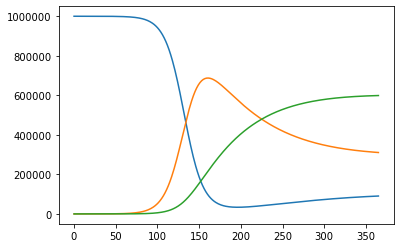

In [42]:
#we are importing the pyplot module from the matplotlib library 
#we are giving it the nickname "plt" (this is the equivalent of "include")

from matplotlib import pyplot as plt
plt.plot(S)  #we are using the plot fucntion of the pyplot module which has the nickname plt
plt.plot(I)
plt.plot(R)

#this could betterized in a plethora of ways including
#title, axes labels, legends, etc

## Other discrete time models

### Lotka-Volterra Predatory Prey Model

Here we let $H$ be the population of a prey species and $P$ be the population of the predator species.

\begin{align*}
H_{t+1}-H_t&=\alpha H_t - \beta H_t P_t\\
P_{t+1}-P_t&=\gamma H_t P_t - \delta P_t
\end{align*}



## Social Science: The Daley-Kendall Model
___
![rumor](http://www.thatsnonsense.com/wp-content/uploads/2012/01/rumours.jpg)

The flow of information through society impacts all of us, whether it be through malicious rumors about us, government propaganda, or fake news cites attempting to influence the government. Daley and Kendall formulated a basic model for the spread of rumors that we can build new models from. Their model has three compartments:
1. Ignorants (I): these are people ignorant of the rumor. 
2. Spreaders (S): these are people actively spreading the rumor.
3. Stiflers (R): there are people who are bored with the rumor.

More interesting than the compartments of the models are the rules in which they interact:
$$I + S \to S + S,$$
$$S + S \to S + R,$$
$$R + S \to R + R.$$

This leads to the following equations:
\begin{align*}
I_{t+1}-I_{t}&=-\beta I_tS_t\\
S_{t+1}-S_t&=\beta I_tS_t - \alpha S_t(S_t+R_t)\\
R_{t+1}-R_{t}&=\alpha S_t(S_t+R_t)
\end{align*}

# Fibonacci Numbers and Prime Numbers

1) Create a list of the first 10 prime numbers


In [60]:
N=10


2) The  Fibonnaci numbers are given by $a_1=a_2=1$, $a_{n}=a_{n-1}+a_{n-2}$ for $n\geq 2$.

Create a list of the first ten Fibonnaci numbers

In [2]:
N=10
